In [1]:
import pandas as pd

!wget https://course.ccs.neu.edu/cs6220/lecture-labs/lecture-3/abalone.csv

--2023-02-02 02:58:52--  https://course.ccs.neu.edu/cs6220/lecture-labs/lecture-3/abalone.csv
Resolving course.ccs.neu.edu (course.ccs.neu.edu)... 129.10.117.35
Connecting to course.ccs.neu.edu (course.ccs.neu.edu)|129.10.117.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 191962 (187K) [text/csv]
Saving to: ‘abalone.csv’

abalone.csv         100%[===================>] 187.46K   343KB/s    in 0.5s    

2023-02-02 02:58:54 (343 KB/s) - ‘abalone.csv’ saved [191962/191962]



# Read in Abalone data

In [2]:
df = pd.read_csv("abalone.csv")

# Explore the data

In this lab, you're going to drop features and scatter the points after projecting along 2 principle components axes.

For example, you may drop columns in `Pandas` by typing 


1. Prune the data. Drop columns `Sex` and/or `Rings`. \
   ```matrix = df.loc[:, df.columns != "Sex"]```

1. Calculate the covariance matrix. You can calculate the covariance matrix via: \
   $$Cov(X_i, X_j) = \mathbb{E}[(X_i - \mu_{x_i})(X_j - \mu_{x_j})^T]$$

1. Calculate the first two components of PCA. You can feel free to use `np.linalg.eig`.

1. Verify the principle components. To calculate PCA, feel free to use the PCA function from `scikit.learn`. \

  ```
  from sklearn.decomposition import PCA
  # Two components of PCA
  pca = PCA(2)

  # Fit on data
  pca.fit(A)

  # Access values and vectors
  print(pca.components_)
  print(pca.explained_variance_)

  # transform data
  B = pca.transform(A)
  print(B)
  ```

1. Scatter the data to view it in two dimensions

In [3]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
df=df.drop(columns=["Sex","Rings"]) # I dropped both Sex and Rings

In [7]:
df.columns

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight'],
      dtype='object')

In [18]:
#calculate Cov
import numpy as np
Cov=np.cov(df.T) #记得transpose，因为要的是X_T，这样得到的才是n*n的协方差矩阵
print(Cov)

[[0.01442231 0.01176082 0.00415691 0.05449071 0.02393495 0.01188723
  0.01500717]
 [0.01176082 0.00984855 0.00346055 0.04503818 0.0196742  0.0097873
  0.01250664]
 [0.00415691 0.00346055 0.0017495  0.01680347 0.00719489 0.00366017
  0.0047589 ]
 [0.05449071 0.04503818 0.01680347 0.24048139 0.10551803 0.05194616
  0.06521587]
 [0.02393495 0.0196742  0.00719489 0.10551803 0.04926755 0.0226749
  0.02727096]
 [0.01188723 0.0097873  0.00366017 0.05194616 0.0226749  0.01201528
  0.01384956]
 [0.01500717 0.01250664 0.0047589  0.06521587 0.02727096 0.01384956
  0.01937738]]


In [23]:
Cov.shape

(7, 7)

In [19]:
eigval, eigvec = np.linalg.eig(Cov)

In [20]:
print(eigvec) #特征向量矩阵

[[-1.93156059e-01  3.50069286e-01 -6.55435958e-01 -3.87845990e-02
  -6.20285186e-01  1.55845008e-01  5.60615302e-04]
 [-1.59552075e-01  3.18820741e-01 -5.05473077e-01  1.80604524e-02
   7.81379947e-01  7.48357409e-02 -3.02034552e-02]
 [-5.92827068e-02  1.34751753e-01 -8.60795787e-02  4.68325197e-03
  -4.73954978e-02 -9.24448472e-01 -3.37704883e-01]
 [-8.42619224e-01  1.88240197e-02  3.11470276e-01 -1.27977156e-01
  -6.24787436e-03  1.67979449e-01 -3.84695312e-01]
 [-3.71958945e-01 -7.03431694e-01 -3.37272496e-01  3.53767145e-01
   1.25725048e-02 -1.62443835e-01  3.18402885e-01]
 [-1.82251024e-01  1.29477099e-02  2.50613453e-02 -7.62977566e-01
   3.37328611e-02 -2.07282449e-01  5.82880918e-01]
 [-2.28349259e-01  5.12160776e-01  3.09994257e-01  5.23911759e-01
  -3.33215094e-02 -1.33924825e-01  5.43986951e-01]]


In [25]:
eigval.shape

(7,)

In [21]:
eigvec.shape

(7, 7)

In [26]:
print(eigval) #特征值

[3.38170727e-01 3.96403025e-03 2.90771416e-03 1.05490434e-03
 1.48141736e-04 4.89663867e-04 4.26787482e-04]


In [28]:
from sklearn.decomposition import PCA
# Two components of PCA
pca = PCA(2)

# Fit on data
pca.fit(df)

# Access values and vectors
print(pca.components_)
print(pca.explained_variance_)

# transform data
B = pca.transform(df)
print(B)

[[ 0.19315606  0.15955208  0.05928271  0.84261922  0.37195895  0.18225102
   0.22834926]
 [-0.35006929 -0.31882074 -0.13475175 -0.01882402  0.70343169 -0.01294771
  -0.51216078]]
[0.33817073 0.00396403]
[[-0.37297053  0.00140299]
 [-0.72693017  0.02987049]
 [-0.17700541 -0.05958994]
 ...
 [ 0.41895149  0.01668526]
 [ 0.34791783  0.02404874]
 [ 1.31843776  0.13799284]]


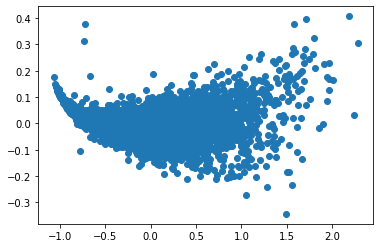

In [29]:
import matplotlib.pyplot as plt

plt.scatter(B[:, 0], B[:, 1],marker='o')
plt.show()

In [30]:
df_use_8 = pd.read_csv("abalone.csv")

In [32]:
df_use_8=df_use_8.drop(columns=["Sex"])

[[ 0.02105132  0.01794012  0.0073163   0.08368049  0.02973466  0.01745992
   0.02743115  0.99510682]
 [ 0.18305275  0.14880419  0.05245956  0.83446131  0.3999516   0.18325279
   0.20527245 -0.0979371 ]]
[10.49543138  0.23926882]
[[ 5.00480331 -0.86692655]
 [-2.99106199 -0.43457164]
 [-0.94603495 -0.08673867]
 ...
 [-0.88806992  0.5087862 ]
 [ 0.0998919   0.34089986]
 [ 2.18474351  1.11378693]]


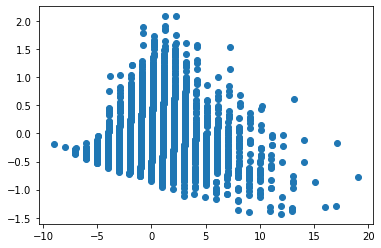

In [34]:
from sklearn.decomposition import PCA
# Two components of PCA
pca = PCA(2)

# Fit on data
pca.fit(df_use_8)

# Access values and vectors
print(pca.components_)
print(pca.explained_variance_)

# transform data
B = pca.transform(df_use_8)
print(B)

import matplotlib.pyplot as plt

plt.scatter(B[:, 0], B[:, 1],marker='o')
plt.show()